In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

# https://data.wprdc.org/dataset/prt-monthly-average-ridership-by-route
data = pd.read_csv('12bb84ed-397e-435c-8d1b-8ce543108698.csv')

# View the first few rows of the dataset
data.head()

_id route ridership_route_code    route_full_name current_garage mode  \
0    1     1                  001  1 - FREEPORT ROAD           Ross  Bus   
1    2     4                  004      4 - TROY HILL           Ross  Bus   
2    3     6                  006    6 - SPRING HILL           Ross  Bus   
3    4     8                  008    8 - PERRYSVILLE           Ross  Bus   
4    5    11                  011      11 - FINEVIEW           Ross  Bus   

  month_start  year_month day_type  avg_riders  day_count  
0  2017-01-01      201701     SAT.      969.50          4  
1  2017-01-01      201701     SAT.      218.25          4  
2  2017-01-01      201701     SAT.      495.50          4  
3  2017-01-01      201701     SAT.     1480.00          4  
4  2017-01-01      201701     SAT.      208.00          4

In [2]:
data.columns

Index(['_id', 'route', 'ridership_route_code', 'route_full_name',
       'current_garage', 'mode', 'month_start', 'year_month', 'day_type',
       'avg_riders', 'day_count'],
      dtype='object')

[PRT Monthly Average Ridership by Route](https://data.wprdc.org/dataset/prt-monthly-average-ridership-by-route)

In [4]:
# Summary statistics for average riders
print(data['avg_riders'].describe())

# Total riders per transit mode
mode_summary = data.groupby('mode')['avg_riders'].sum().reset_index()
print(mode_summary)

count    22317.000000
mean      1189.182466
std       1394.175838
min         -1.954545
25%        340.750000
50%        727.238095
75%       1486.000000
max      11510.250000
Name: avg_riders, dtype: float64
         mode    avg_riders
0         Bus  2.281862e+07
1     Incline  3.324947e+05
2  Light Rail  8.115560e+05
3        Rail  2.576082e+06


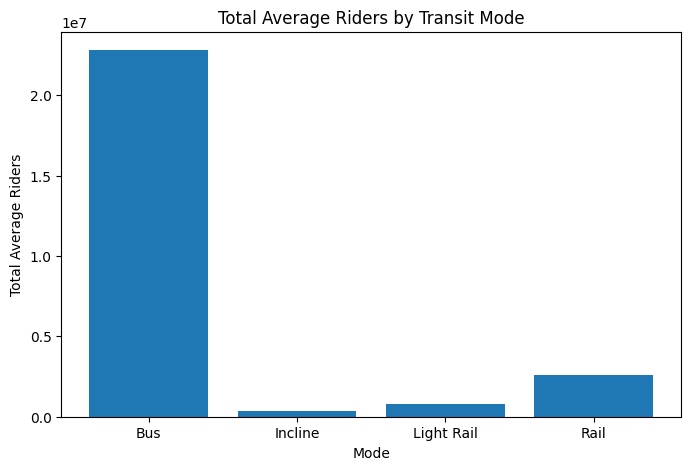

In [5]:
# Bar plot of average riders by mode
plt.figure(figsize=(8, 5))
plt.bar(mode_summary['mode'], mode_summary['avg_riders'])
plt.title('Total Average Riders by Transit Mode')
plt.xlabel('Mode')
plt.ylabel('Total Average Riders')
plt.show()

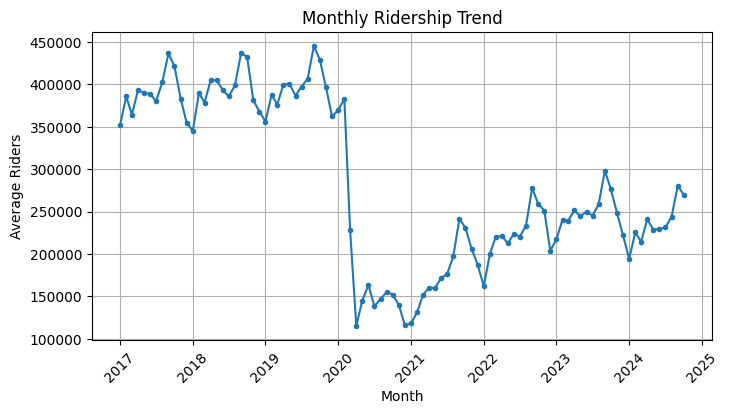

In [23]:
# Convert 'month_start' to datetime for plotting
data['month_start'] = pd.to_datetime(data['month_start'])

# Group data by month to get total average riders
monthly_ridership = data.groupby('month_start')['avg_riders'].sum().reset_index()

# Line plot of ridership over time
plt.figure(figsize=(8, 4))
plt.plot(monthly_ridership['month_start'], monthly_ridership['avg_riders'], marker='.')
plt.title('Monthly Ridership Trend')
plt.xlabel('Month')
plt.ylabel('Average Riders')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('monthly_ridership_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

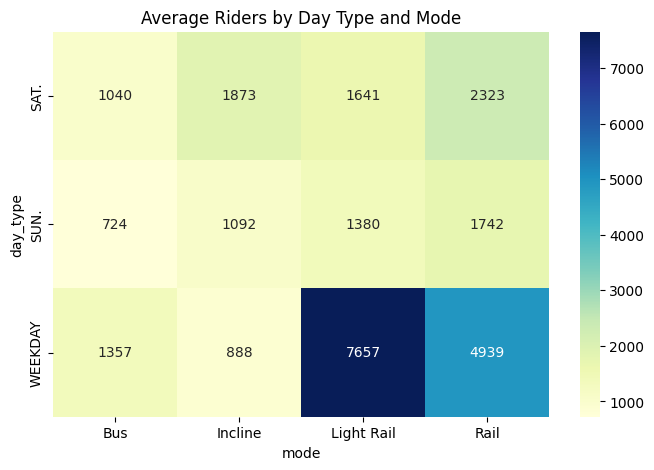

In [7]:
# Pivot table for heatmap
pivot = data.pivot_table(values='avg_riders', index='day_type', columns='mode', aggfunc='mean')

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Average Riders by Day Type and Mode')
plt.show()

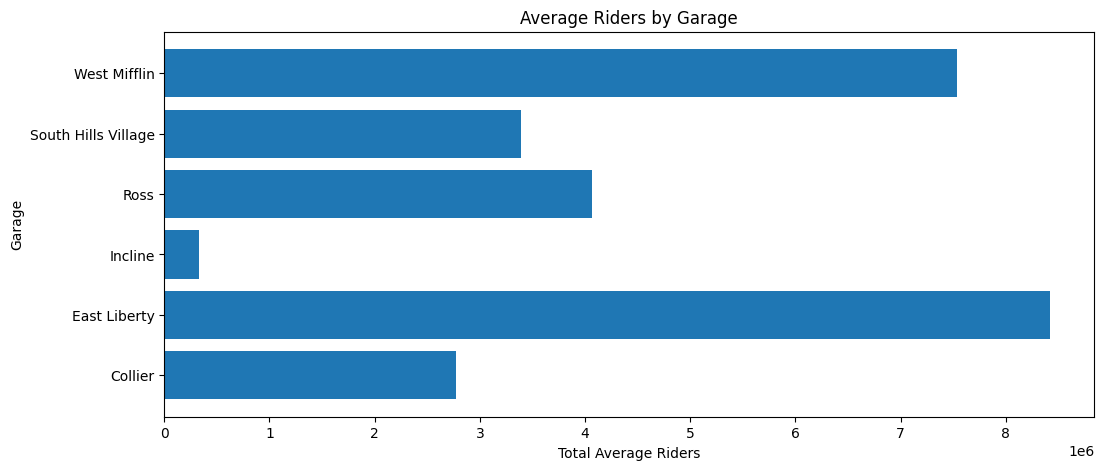

In [8]:
# Group by garage and sum the riders
garage_ridership = data.groupby('current_garage')['avg_riders'].sum().reset_index()

# Bar plot of riders by garage
plt.figure(figsize=(12, 5))
plt.barh(garage_ridership['current_garage'], garage_ridership['avg_riders'])
plt.title('Average Riders by Garage')
plt.xlabel('Total Average Riders')
plt.ylabel('Garage')
plt.show()

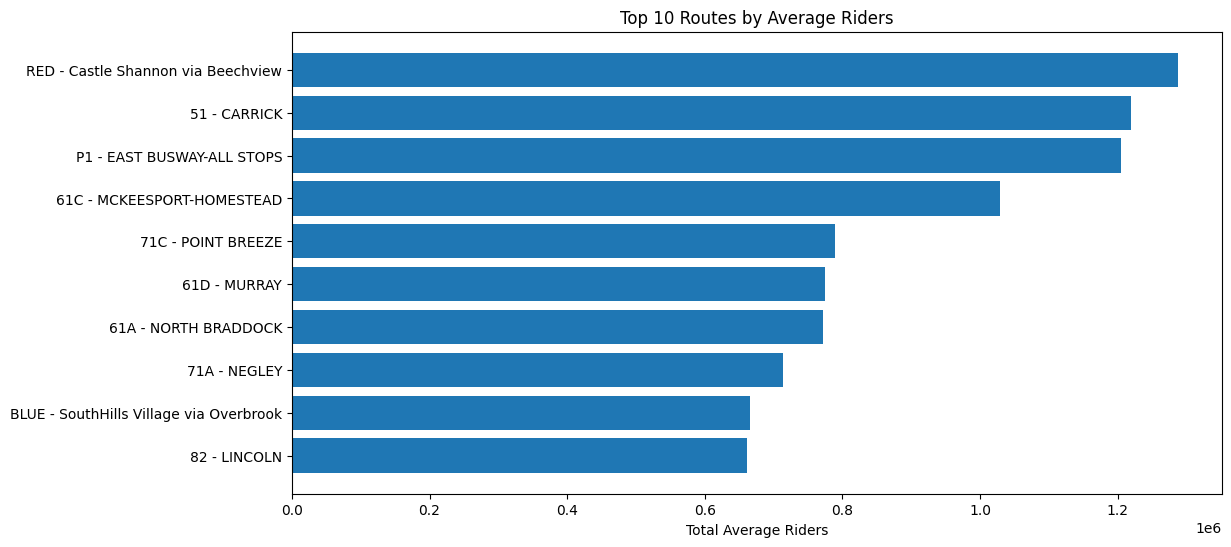

In [9]:
# Group by route and get the total riders
route_ridership = data.groupby('route_full_name')['avg_riders'].sum().reset_index()

# Sort by total riders and plot top 10 routes
top_routes = route_ridership.sort_values(by='avg_riders', ascending=False).head(10)

# Bar plot for top 10 routes
plt.figure(figsize=(12, 6))
plt.barh(top_routes['route_full_name'], top_routes['avg_riders'])
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top 10 Routes by Average Riders')
plt.xlabel('Total Average Riders')
plt.show()

In [10]:
# Group by day_type and calculate the mean and variance
day_type_stats = data.groupby('day_type')['avg_riders'].agg(['mean', 'var']).reset_index()
print(day_type_stats)

  day_type         mean           var
0     SAT.  1112.618227  1.159557e+06
1     SUN.   782.783580  5.871116e+05
2  WEEKDAY  1513.216543  3.176469e+06


In [11]:
# Interactive line plot with Plotly
fig = px.line(monthly_ridership, x='month_start', y='avg_riders', 
              title='Interactive Monthly Ridership Trend')
fig.show()

In [12]:
# Prepare data for Sunburst (group by mode, day_type, and sum avg_riders)
sunburst_data = data.groupby(['mode', 'day_type']).agg({'avg_riders': 'sum'}).reset_index()

# Create Sunburst chart
fig = px.sunburst(
    sunburst_data, 
    path=['mode', 'day_type'], 
    values='avg_riders',
    title='Sunburst Chart: Riders by Mode and Day Type',
    color='avg_riders',
    color_continuous_scale='Blues'
)
fig.show()

In [13]:
# Extracting month names and preparing the data for a sunburst plot
data['month'] = data['month_start'].dt.strftime('%B')  # Get month names
sunburst_data = data.groupby(['month', 'mode']).agg({'avg_riders': 'sum'}).reset_index()

# Creating the sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['month', 'mode'],
    values='avg_riders',
    title='Sunburst Chart: Riders by Month and Mode',
    color='avg_riders',
    color_continuous_scale='Blues'
)

fig.show()

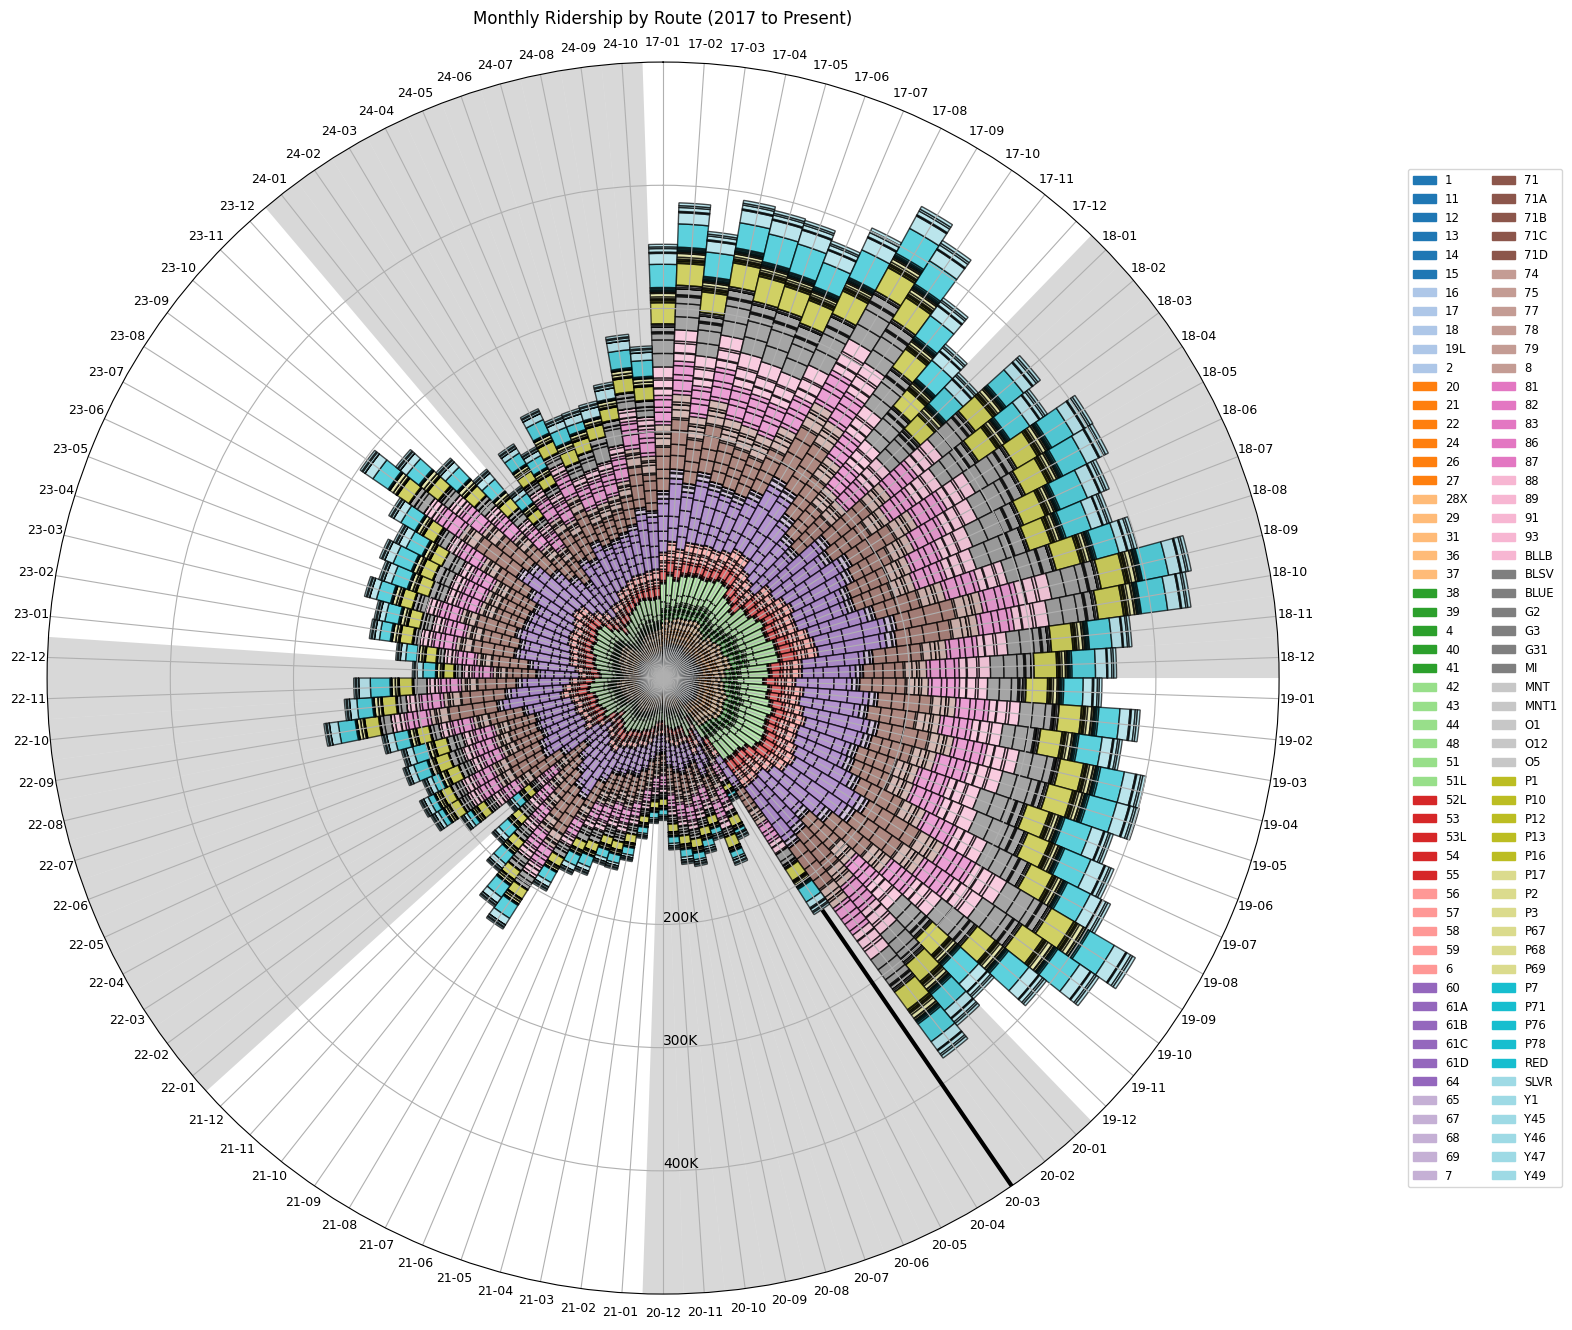

In [21]:
# Convert the 'month_start' column to datetime for filtering and grouping
data['month_start'] = pd.to_datetime(data['month_start'])

# Filter the data from January 2017 onwards
filtered_data = data[data['month_start'] >= '2017-01-01']

# Group the data by year-month and route, summing the average riders
monthly_ridership = filtered_data.groupby(
    [filtered_data['month_start'].dt.to_period('M'), 'route']
)['avg_riders'].sum().reset_index()

# Create a unique month-year identifier with the format YY-MM
monthly_ridership['month_year'] = monthly_ridership['month_start'].dt.strftime('%y-%m')

# Pivot the data to create a matrix where each row is a month and each column is a route
pivot_data = monthly_ridership.pivot_table(
    index='month_year', columns='route', values='avg_riders', fill_value=0
)

# Adding alternating background colors for entire pie slices (from center to edge)
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw={'projection': 'polar'})

# Set radius explicitly
ax.set_ylim(0, 500000)  # Set the radial limits from 0 to 500,000


# Define angles and bar width
num_months = len(pivot_data)
angles = np.linspace(0, 2 * np.pi, num_months, endpoint=False).tolist()
width = 2 * np.pi / num_months

# Generate color map for routes
colors = plt.cm.tab20(np.linspace(0, 1, pivot_data.shape[1]))

# Plot the alternating background for years as full slices
for idx, month in enumerate(pivot_data.index):
    year = month.split('-')[0]  # Extract year (YY format)
    if int(year) % 2 == 0:  # Even years get light gray
        ax.bar(
            angles[idx], 500000, width=width, color='gray', edgecolor=None, alpha=0.3
        )

# Plot each month as a stacked bar in polar coordinates
for idx, (month, row) in enumerate(pivot_data.iterrows()):
    bottom = 0
    for i, value in enumerate(row):
        ax.bar(
            angles[idx], value, width=width, bottom=bottom, color=colors[i], edgecolor='black', alpha=0.7
        )
        bottom += value

# Highlight the radial line for 20-03 in dark thick black
highlight_month = '20-03'
highlight_angle = angles[pivot_data.index.get_loc(highlight_month)]  # Find the angle for 20-03

# Adding a thicker line for 20-03 to indicate start of covid
ax.plot(
    [highlight_angle, highlight_angle],  # Angle for the line
    [230000, 500000],  # From the center to the outer edge
    color='black', linewidth=3, zorder=3  # Dark thick black line
)

# Add labels for each month-year with radial alignment
ax.set_xticks(angles)
ax.set_xticklabels(
    pivot_data.index, fontsize=9, ha='center', va='center', rotation_mode='anchor'
)

# Rotate the labels along the radial axis
for label, angle in zip(ax.get_xticklabels(), angles):
    label.set_rotation(np.degrees(angle) + 90)  # Rotate 90 degrees for radial alignment

# Set the starting location to 0 degrees (with 17-01 at the top)
ax.set_theta_zero_location('N')  # 'N' means north, i.e., 0 degrees at the top

# Set the direction to clockwise
ax.set_theta_direction(-1)  # -1 sets the direction to clockwise

# Move the radial tick labels to align with the 2020-11 radii
target_angle = angles[pivot_data.index.get_loc('20-12')]  # Angle for 2020-12
ax.set_rlabel_position(np.degrees(target_angle))  # Align radial tick labels to this angle

# Customize the radial ticks to exclude 10,000
ax.set_yticks([200000, 300000, 400000])  # Only include these tick values
ax.set_yticklabels(['200K', '300K', '400K'], fontsize=10)  # Format the labels

# Add a title
plt.title('Monthly Ridership by Route (2017 to Present)', va='bottom')

# Display a two-column legend for route colors
ax.legend(
    [plt.Rectangle((0, 0), 1, 1, color=c) for c in colors],
    pivot_data.columns,
    loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', ncol=2
)

# Show and save the plot
plt.savefig('monthly_ridership_circular_plot.png', dpi=300, bbox_inches='tight')
plt.show()
